In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv(r"C:\Users\ms\Downloads\housing.csv\housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [20]:
data=pd.get_dummies(data,columns=['ocean_proximity'],drop_first=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [21]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
X.shape,y.shape

((20433, 12), (20433,))

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#check skewed columns


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

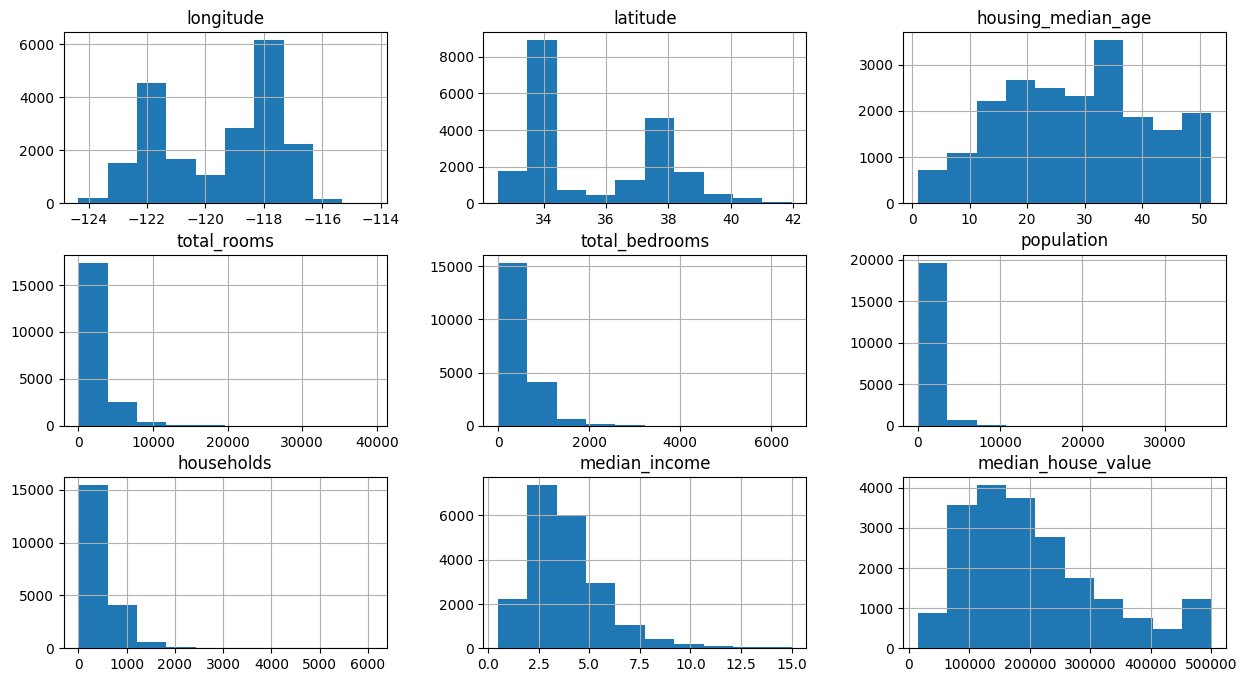

In [32]:
data.hist(figsize=(15,8))

<Axes: >

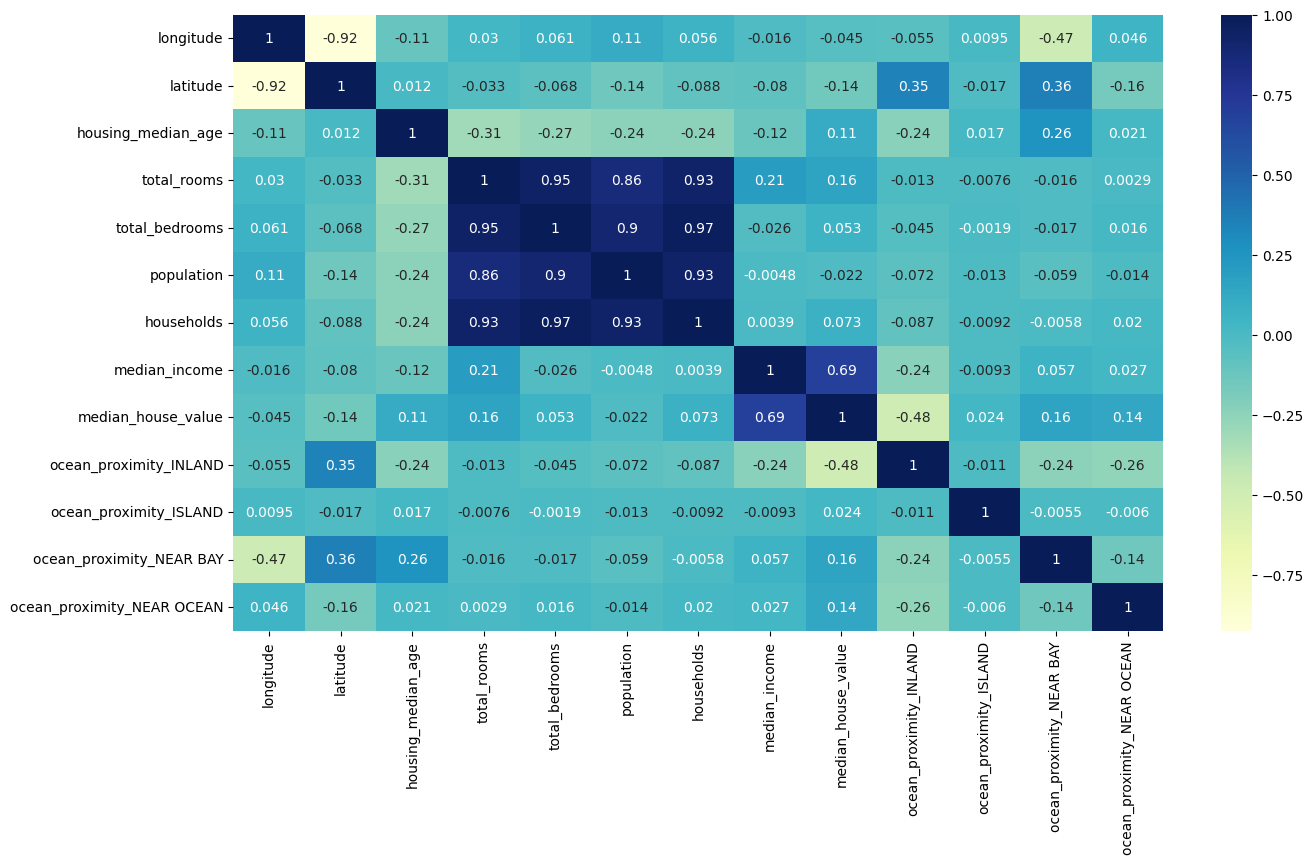

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

make columns follow normal distribution

In [33]:
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)


In [34]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,True,False


In [36]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
X.shape,y.shape


((20433, 12), (20433,))

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,False,False,False,False
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,True,False,False,False
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,True,False,False,False
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,False,False,False,False
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,False,False,False,False
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,False,False,False,False
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,False,False,False,False
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,False,False,True,False


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

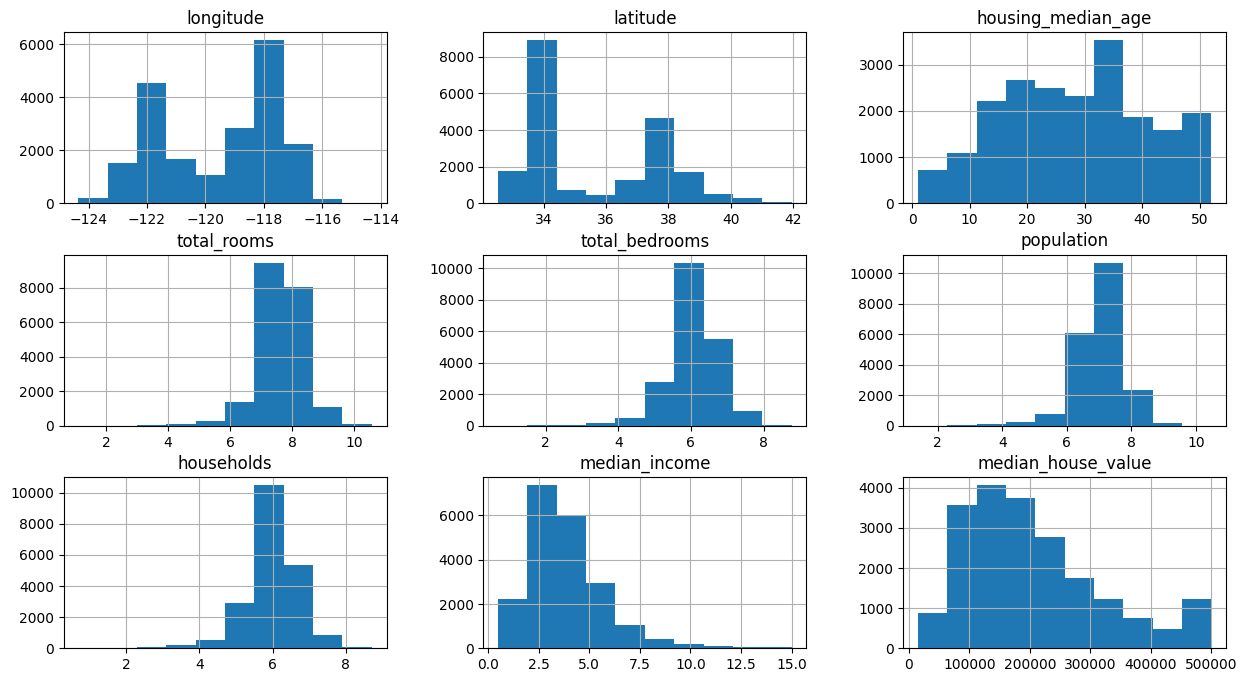

In [41]:
data.hist(figsize=(15,8))

In [44]:
# إضافة العواميد للـ Train
X_train['rooms_per_household'] = X_train['total_rooms'] / X_train['households']
X_train['bedrooms_per_room'] = X_train['total_bedrooms'] / X_train['total_rooms']

# إضافة نفس العواميد للـ Test (خطوة إجبارية)
X_test['rooms_per_household'] = X_test['total_rooms'] / X_test['households']
X_test['bedrooms_per_room'] = X_test['total_bedrooms'] / X_test['total_rooms']

<Axes: >

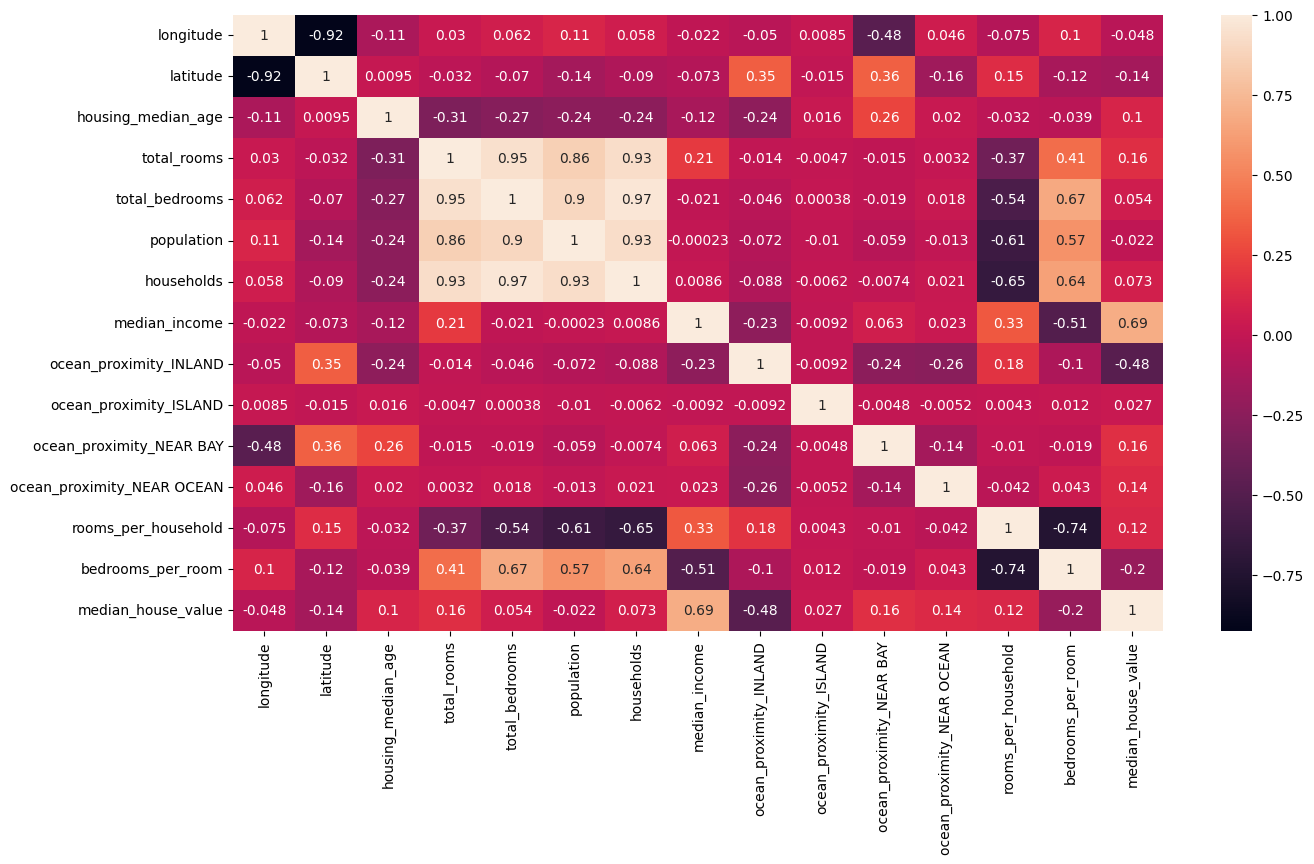

In [49]:
data_with_new_featyres=X_train.copy()
data_with_new_featyres['median_house_value']=y_train
plt.figure(figsize=(15,8))
sns.heatmap(data_with_new_featyres.corr(),annot=True)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)
train_pred=reg.predict(X_train_scaled)
train_mse=mean_squared_error(train_pred,y_train)
train_Rmse=np.sqrt(train_mse)
print('train mse = ',train_mse)
print('train Rmse = ',train_Rmse)


train mse =  4347534967.834793
train Rmse =  65935.83978258556


In [56]:
tets_pred=reg.predict(X_test_scaled)
test_mse=mean_squared_error(y_test,tets_pred)
test_Rmse=np.sqrt(test_mse)
print('test_mse = ',test_mse)
print('test_Rmse = ',test_Rmse)

test_mse =  4530030653.760368
test_Rmse =  67305.50240329812


In [58]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,random_state=42)
forest.fit(X_train_scaled,y_train)
forest_train_pred=forest.predict(X_train_scaled)
forest_train_mse=mean_squared_error(forest_train_pred,y_train)
forest_train_Rmse=np.sqrt(forest_train_mse)
print('forest_train_mse',forest_train_mse)
print('forest_train_Rmse',forest_train_Rmse)



forest_train_mse 341877999.1109391
forest_train_Rmse 18489.943188418376


In [60]:
forest.fit(X_train_scaled,y_train)
forest_test_pred=forest.predict(X_test_scaled)
forest_test_mse=mean_squared_error(forest_test_pred,y_test)
forest_test_Rmse=np.sqrt(forest_test_mse)
print('forest_test_mse',forest_test_mse)
print('forest_test_Rmse',forest_test_Rmse)


forest_test_mse 2471211306.870093
forest_test_Rmse 49711.279473275405


In [ ]:
forest_reg_refined = RandomForestRegressor(
    n_estimators=200,      
    max_depth=15,           
    min_samples_leaf=5,     
    random_state=42,
    n_jobs=-1               
)

forest_reg_refined.fit(X_train_scaled, y_train)

train_preds = forest_reg_refined.predict(X_train_scaled)
test_preds = forest_reg_refined.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"Refined Random Forest Results:")
print(f"Train RMSE: ${train_rmse:,.2f}")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"Difference (Gap): ${abs(test_rmse - train_rmse):,.2f}")


------------------------------
Refined Random Forest Results:
Train RMSE: $35,359.99
Test RMSE: $50,678.05
Difference (Gap): $15,318.06
------------------------------
